In [2]:
# https://classroom.udacity.com/courses/st101/lessons/48687890/concepts/486878890923
from math import *
import matplotlib.pyplot as plt

1.0
i, p_dist, s
0 0.10737418240000006 1.0
1 0.10737418240000006 1.0
2 0.10737418240000006 1.0
3 0.10737418240000006 1.0
4 0.10737418240000006 1.0
5 0.10737418240000006 1.0
6 0.10737418240000006 1.0
7 0.10737418240000006 1.0
8 0.10737418240000006 1.0
9 0.10737418240000006 1.0
10 0.10737418240000006 1.0


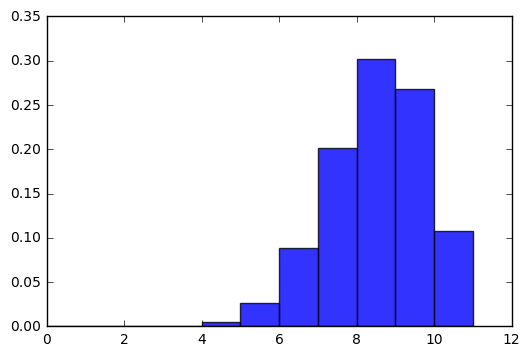

In [29]:
N = 10
p0 = 0.8

p_dist = [factorial(N)/(factorial(N-k)*factorial(k))*p0**k*(1-p0)**(N-k) for k in range(N+1)]
# print(p_dist)
s = [sum(p_dist[:i+1]) for i in range(len(p_dist))]
print(sum(p_dist))
print("i, p_dist, s")
for k in range(N+1):
    print(k, p_dist[i], s[i])
    



bar_width = 1
opacity = 0.8
rects1 = plt.bar(range(N+1), p_dist, bar_width,
                 alpha=opacity,
                 color='b',)
plt.show()

In [44]:
count = [4,6,7,11,2]
age = [21,24,26,29,40]
data = []
for i in range(len(age)):
    for k in range(count[i]):
        data.append(age[i])
print(data)

mean = float(sum(data)/len(data))
stddev = 1/len(data)*sum([(data[i]-mean)**2 for i in range(len(data))])
print(mean)
print(stddev)

# CI table value
a = 1.96
CI = a*sqrt(stddev/len(data))
print(CI)

[21, 21, 21, 21, 24, 24, 24, 24, 24, 24, 26, 26, 26, 26, 26, 26, 26, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 40, 40]
26.966666666666665
19.56555555555556
1.5828564708802273


In [47]:
from math import sqrt

def mean(l):
    return float(sum(l))/len(l)

def var(l):
    m = mean(l)
    return sum([(x-m)**2 for x in l])/len(l)

def factor(l):
    return 1.96 


def conf(l):
    return factor(l)*sqrt(var(l)/len(l))

l = [1,2,3,4,5,6,7,8,9,10]
print(mean(l), "+/-", conf(l))

5.5 +/- 1.780258408209325


In [65]:
# Programming Tests: Hypothesis Test

#Complete the test function to perform a hypothesis test 
#on list l under the null that the mean is h

from math import sqrt
import random

def mean(l):
    return float(sum(l))/len(l)

def var(l):
    m = mean(l)
    return sum([(x-m)**2 for x in l])/len(l)

def factor(l):
    return 1.96


def conf(l):
    return factor(l) * sqrt(var(l) / len(l))


def test(l, h):
    #Insert your code here
    interval = conf(l)
    mu = mean(l)
    lower = mu - interval
    upper = mu + interval
    return h > lower and h < upper

l = [0,0,0,0,0,1,1,1,1,1]
print(mean(l), "+/-", conf(l))
print(test(l, 0.5))

l = [1,1,1,1,1,1,0,0,1,1]
print(mean(l), "+/-", conf(l))
print(test(l, 0.5))

l = [random.random() > 0.499 for i in range(1000)]
print(mean(l), "+/-", conf(l))
print(test(l, 0.5))

l = [1 for i in range(55)]+[0 for j in range(45)]
print(mean(l), "+/-", conf(l))
print(test(l, 0.5))

0.5 +/- 0.3099032106965012
True
0.8 +/- 0.2479225685572009
False
0.476 +/- 0.030954599632364615
True
0.55 +/- 0.09750876883644868
True


In [82]:
# Problem Set 5: Sample Size

Votes_A = 55
Votes_B = 45
t = 1.96
p = Votes_A/(Votes_A+Votes_B)
CI = t*sqrt(p*(1-p)/(Votes_A+Votes_B))
print(CI*100,"%")

n = 381
CI = t*sqrt(p*(1-p)/(n))
print(CI*100,"%")


9.750876883644874 %
4.995525556991094 %


In [91]:
# Problem Set 5: Sensitivity

p = 0.55
t = 1.96
n = 100
e = t*sqrt(p*(1-p)/(n))
print(e)
e = 0.05 #desired confidence
p = 0.5
n = t**2/e**2*p*(1-p) #minimum number of people to poll
print(n)
p = 0.6
n = t**2/e**2*p*(1-p)
print(n)

0.09750876883644875
384.1599999999999
368.7935999999999


In [93]:
# Problem Set 5: Weight Loss

n = 10000
mu_A = 10
sigma_A = 10
mu_B = 20
sigma_B = 20

t = 1.96
CI_A = t*sigma_A/sqrt(n)
CI_B = t*sigma_B/sqrt(n)
print(mu_A,"+/-",CI_A)
print(mu_B,"+/-",CI_B)

10 +/- 0.196
20 +/- 0.392


In [99]:
# Problem Set 5: Large Sample Test
n = 10e6
mu = 0.0101-0.01
sigma = mu*(1-mu)


t = 1.96
CI = t*sigma/sqrt(n)
print(mu,"+/-",CI)

9.99999999999994e-05 +/- 6.197444407508593e-08


In [247]:
# Linear Regression
# Correlation

def linest(x, y, verbose = False):
    # means
    x_bar = float(sum(x))/len(x)
    y_bar = float(sum(y))/len(y)
    
    # covariance
    covar = sum([(xi-x_bar)*(yi-y_bar) for xi,yi in zip(x,y)])
    
    # variance * N
    xNvar = sum([(xi-x_bar)**2 for xi in x])
    yNvar = sum([(yi-y_bar)**2 for yi in y])
    
    # fit values
    b =  covar / xNvar
    a = y_bar-b*x_bar
    
    # correlation
    r = covar/sqrt(xNvar*yNvar)
    
    if verbose:
        print("x_bar =", x_bar)
        print("y_bar =", y_bar)
        print("covariance =",covar)
        print("N * Var(x) =",xNvar)
        print("N * Var(y) =",yNvar)
    return(b,a,r)

data_x = [2,4,6]
data_y = [8,14,26]

b,a,r = linest(data_x, data_y, True)
print("y=", b, "x +",a)
print("r=", r)

x_bar = 4.0
y_bar = 16.0
covariance = 36.0
N * Var(x) = 8.0
N * Var(y) = 168.0
y= 4.5 x + -2.0
r= 0.9819805060619657


In [243]:
# Monty Hall Problem
from random import randint

def naive_simulate(N):
    K = 0
    ###insert your code here###
    doors = [0,1,2]
    for i in range(N):
        prize = randint(0,2)
        guess = randint(0,2)
        K += prize == guess
        
    return (float(K) / float(N))

def simulate(N):
    K = 0
    ###insert your code here###
    doors = [0,1,2]
    for i in range(N):
        prize = randint(0,2)
        guess = randint(0,2)
        no_prize = [door for door in doors if door!=prize and door!=guess]
        show = no_prize[randint(0,len(no_prize)-1)]
        guess = [door for door in doors if door!=show and door!=guess][0]
        K += prize == guess
        
    return (float(K) / float(N))

N = 1000

print (simulate(N))

0.671


In [4]:
# Flash Crash
n = 69999
mu = -0.00074
sigma = 0.01344


t = 1.96
CI = t*sigma/sqrt(n)
print(mu,"+/-",CI)
print(mu-CI, "to", mu+CI)

-0.00074 +/- 9.956562452355494e-05
-0.000839565624523555 to -0.000640434375476445


In [8]:
# Challenger

def linest(x, y, verbose = False):
    # means
    x_bar = float(sum(x))/len(x)
    y_bar = float(sum(y))/len(y)
    
    # covariance
    covar = sum([(xi-x_bar)*(yi-y_bar) for xi,yi in zip(x,y)])
    
    # variance * N
    xNvar = sum([(xi-x_bar)**2 for xi in x])
    yNvar = sum([(yi-y_bar)**2 for yi in y])
    
    # fit values
    b =  covar / xNvar
    a = y_bar-b*x_bar
    
    # correlation
    r = covar/sqrt(xNvar*yNvar)
    
    if verbose:
        print("x_bar =", x_bar)
        print("y_bar =", y_bar)
        print("covariance =",covar)
        print("N * Var(x) =",xNvar)
        print("N * Var(y) =",yNvar)
    return(b,a,r)

data_x = [70,57,63,70,53,75,58]
data_y = [1,1,1,1,2,2,1]

b,a,r = linest(data_x, data_y, True)
print("y=", b, "x +",a)
print("r=", r)

x = 38
print("expected failures at", x, "degrees is", x*b+a)

x_bar = 63.714285714285715
y_bar = 1.2857142857142858
covariance = 0.5714285714285721
N * Var(x) = 399.42857142857144
N * Var(y) = 1.4285714285714286
y= 0.0014306151645207454 x + 1.1945636623748213
r= 0.023921665197228614
expected failures at 38  degrees is 1.2489270386266096


1.0000000000000004
i, p_dist, s
0 0.20971520000000007 0.20971520000000007
1 0.36700160000000015 0.5767168000000003
2 0.27525120000000014 0.8519680000000004
3 0.11468800000000005 0.9666560000000004
4 0.02867200000000001 0.9953280000000004
5 0.004300800000000002 0.9996288000000004
6 0.00035840000000000015 0.9999872000000004
7 1.2800000000000005e-05 1.0000000000000004


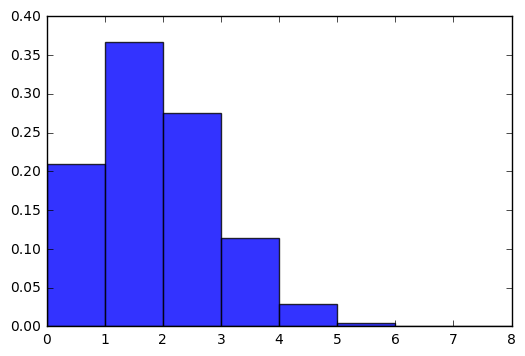

In [10]:
# Final, #9
N = 7
p0 = 0.2

p_dist = [factorial(N)/(factorial(N-k)*factorial(k))*p0**k*(1-p0)**(N-k) for k in range(N+1)]
# print(p_dist)
s = [sum(p_dist[:i+1]) for i in range(len(p_dist))]
print(sum(p_dist))
print("i, p_dist, s")
for k in range(N+1):
    print(k, p_dist[k], s[k])
    



bar_width = 1
opacity = 0.8
rects1 = plt.bar(range(N+1), p_dist, bar_width,
                 alpha=opacity,
                 color='b',)
plt.show()

In [12]:
#final, #14

from math import sqrt

def mean(l):
    return float(sum(l))/len(l)

def var(l):
    m = mean(l)
    return sum([(x-m)**2 for x in l])/len(l)

def factor(l):
    return 1.96 


def conf(l):
    return factor(l)*sqrt(var(l)/len(l))

l = [0.79, 0.7, 0.73, 0.66, 0.65, 0.70, 0.74, 0.81, 0.71, 0.7]
print(mean(l), "+/-", conf(l))
print(mean(l)-conf(l), "to", mean(l)+conf(l))

0.719 +/- 0.029911680661574343
0.6890883193384256 to 0.7489116806615743


In [16]:
# Final, 15

def linest(x, y, verbose = False):
    # means
    x_bar = float(sum(x))/len(x)
    y_bar = float(sum(y))/len(y)
    
    # covariance
    covar = sum([(xi-x_bar)*(yi-y_bar) for xi,yi in zip(x,y)])
    
    # variance * N
    xNvar = sum([(xi-x_bar)**2 for xi in x])
    yNvar = sum([(yi-y_bar)**2 for yi in y])
    
    # fit values
    b =  covar / xNvar
    a = y_bar-b*x_bar
    
    # correlation
    r = covar/sqrt(xNvar*yNvar)
    
    if verbose:
        print("x_bar =", x_bar)
        print("y_bar =", y_bar)
        print("covariance =",covar)
        print("N * Var(x) =",xNvar)
        print("N * Var(y) =",yNvar)
        print("Slope = ", b)
        print("Intercept = ", a)
        print()
    return(b,a,r)

data_x = [0,1,2]
data_y = [0,2,2]

b,a,r = linest(data_x, data_y, True)
print("y=", b, "x +",a)
print("r=", r)

x_bar = 1.0
y_bar = 1.3333333333333333
covariance = 2.0
N * Var(x) = 2.0
N * Var(y) = 2.666666666666667
Slope =  1.0
Intercept =  0.33333333333333326

y= 1.0 x + 0.33333333333333326
r= 0.8660254037844385
